In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [107]:
df=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

#BASIC ANALYSIS OF THE DATA

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [183]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588,2283.731628
std,0.398029,0.0,31503.722652,10.046343,592.599934,1405.261035
min,0.000000,0.0,0.240000,18.000000,0.100000,576.000000
25%,1.000000,0.0,3158.585000,22.000000,16.000000,1068.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000,1928.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000,2887.000000
max,1.000000,0.0,267128.520000,78.000000,8835.980000,8835.000000


Vizualising our Data

In [184]:
df['movement'].value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

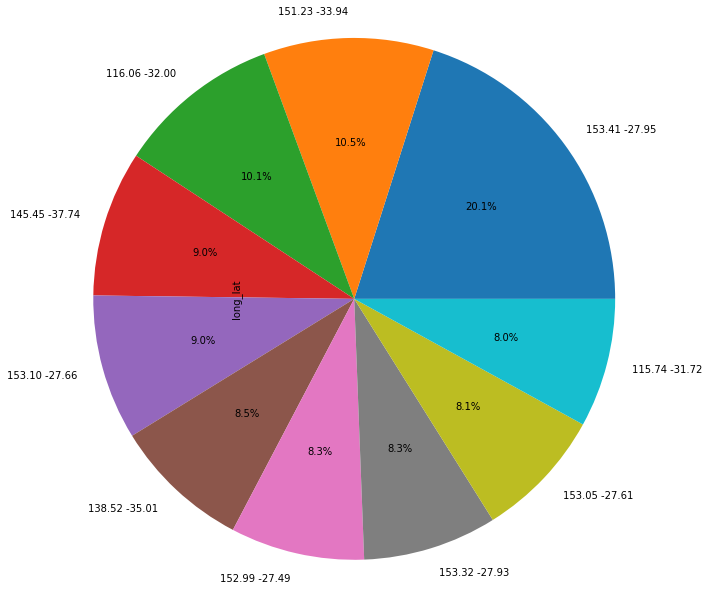

In [185]:
df['long_lat'].value_counts().head(10).plot(kind='pie',radius=3,autopct='%.1f%%')

<BarContainer object of 2 artists>

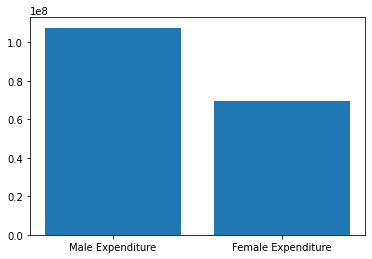

In [186]:
M_toexp=0
F_toexp=0
for ind in df.index:
    if df['gender'][ind]=='M':
        M_toexp=M_toexp+df['balance'][ind]
    else:
        F_toexp=F_toexp+df['balance'][ind]
exp_list=[M_toexp,F_toexp]
label_list=['Male Expenditure','Female Expenditure']
plt.bar(label_list,exp_list)

Seperating the customers into different segments based on their account balance to be used for reccomendations. Customers in the mid ranged bracket and high range bracket tend to spend more on online purchases than the ones in the low range bracket.

In [187]:
l=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]
l6=[]
l7=[]
l8=[]


for ind in df.index:
    if df['balance'][ind] > 150000:
        temp= df['balance'][ind]
        temp1= df['gender'][ind]
        temp2=df['age'][ind]
        l.append(temp)
        l1.append(temp1)
        l2.append(temp2)
    elif df['balance'][ind] < 150000 and df['balance'][ind] > 50000:
        temp= df['balance'][ind]
        temp1= df['gender'][ind]
        temp2=df['age'][ind]
        l3.append(temp)
        l4.append(temp1)
        l5.append(temp2)
    else:
        temp= df['balance'][ind]
        temp1= df['gender'][ind]
        temp2=df['age'][ind]
        l6.append(temp)
        l7.append(temp1)
        l8.append(temp2)

rich={'Balance': l, 'Gender': l1, 'age':l2}
middle={'Balance': l3, 'Gender': l4, 'age':l5}
poor={'Balance': l6, 'Gender': l7, 'age':l8}
    

In [188]:
richdf=pd.DataFrame.from_dict(rich)
middledf=pd.DataFrame.from_dict(middle)
poordf=pd.DataFrame.from_dict(poor)

In [189]:
#Details of the Richer customers 
richdf.head(5)

,Balance,Gender,age
0,260514.83,M,46
1,186371.86,F,40
2,186344.95,F,40
3,186236.30,F,40
4,186195.30,F,40


In [190]:
middledf.head(5)

,Balance,Gender,age
0,58154.74,M,33
1,50383.16,M,38
2,58111.04,M,33
3,54980.99,M,40
4,50671.14,M,19


In [191]:
poordf.head(5)

,Balance,Gender,age
0,35.39,F,26
1,21.20,F,26
2,5.71,M,38
3,2117.22,F,40
4,17.95,F,26


#Finding Salaries of the customers


In [192]:
#Finding Salaries of the customers
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()


,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47,970
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65,3578
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51,1916
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39,1711
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73,3903


In [193]:
salary=[]
for customer_id in df['customer_id']:
  salary.append(int(df_salaries.loc[customer_id]['amount']))
df['annual_salary']=salary

In [194]:
df_cus=df.groupby('customer_id').mean()
df_cus.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


#PREDICTIVE ANALYTICS

In [195]:
x=df_cus.iloc[: ,:-1]
x.drop(columns='merchant_code',inplace=True)
x=round(x,2)
y=df_cus.iloc[:,-1:]
y=round(y,2)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Linear Regression

In [196]:
lr = LinearRegression()
lr.fit(X_train,y_train)
salary_pred=lr.predict(X_test)
r1=lr.score(X_test, y_test)


#Decision Tree Regressor

In [197]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]
a=pd.get_dummies(df_cat)
a.head(5)

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [198]:
N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

In [199]:
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)
decision_tree_reg.predict(X_test)
r2=decision_tree_reg.score(X_test, Y_test)


In [206]:
print('THE LINEAR REGRESSION MODEL GIVES A VERY BAD SCORE OF: ',round(r1*100,2),'%',
      'WEHRE AS THE DECISION TREE MODEL GAVE A MUCH HIGHER SCORE OF: ',round(r2*100,2),'%')

THE LINEAR REGRESSION MODEL GIVES A VERY BAD SCORE OF:  -2.83 % WEHRE AS THE DECISION TREE MODEL GAVE A MUCH HIGHER SCORE OF:  68.31 %
